In [2]:
from ironydetection.preprocessor.bag_of_words import BagOfWords
from ironydetection.preprocessor import DataframePreprocessor, load_csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import os

In [3]:
preprocessor = DataframePreprocessor()
df_raw = load_csv(os.path.join('input', 'datasets', 'train', 'SemEval2018-T3-train-taskA_emoji_ironyHashtags.txt'))
df = preprocessor.preprocess(df_raw)

In [4]:
df.head(10)

,id,label,tweet,hashtags,emojis,n_slang
0,1,1,"[sweet, united, nation, video, just, in, time,...","[#imagine, #noreligion, #irony]",[],0
1,2,1,"[###mention###, we, are, rumored, to, have, ta...",[#sarcasm],[;)],0
2,3,1,"[hey, there, nice, to, see, you, minnesota, nd...",[#not],[],0
3,4,0,"[episode, left, i'm, dying, over, here]",[],[],0
4,5,1,"[i, can't, breathe, wa, chosen, a, the, most, ...",[#irony],[],0
5,6,0,"[you're, never, too, old, for, footie, pajama,...",[],[],0
6,7,1,"[nothing, make, me, happier, then, getting, on...",[#not],[],0
7,8,0,"[an, opening, my, first, beer, now, gonna, be,...",[],[],0
8,9,0,"[###mention###, do, you, think, you, would, su...",[],[],0
9,10,0,"[###mention###, you, are, not, allowed, to, op...",[],[],0


In [5]:
print('Original text: "{}"'.format(df_raw['tweet'].values[24]))
print('Preprocessed text: "{}"'.format(' '.join(df['tweet'].values[24])))

Original text: "Love these cold winter mornings 😬 best feeling everrrrrrr #Not!"
Preprocessed text: "love these cold winter morning grimacing face best feeling everrrrrrr #not"


In [6]:
def plot_comparison(normal, irony, n=3, title='Top 5 hashtags', fontname='Segoe UI Emoji', rotation='horizontal', figsize=(10, 4)):
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(title, fontsize=16, fontname=fontname)
    
    dataframes = (
        pd.DataFrame(normal.items(), columns=['key', 'value']),
        pd.DataFrame(irony.items(), columns=['key', 'value'])
    )
    
    for i, _df in enumerate(dataframes):
        _df = _df.sort_values(by='value', ascending=False)
        
        bar = ax[i].bar(np.arange(0, n) + 0.5, [_df['value'].values[j] for j in range(0, n)])
        ax[i].bar_label(bar)
        
        ax[i].set_ylabel('Count', fontname=fontname)
        ax[i].set_title('Non ironic tweets' if i == 0 else 'Ironic tweets', fontname=fontname)
        ax[i].set_xticks(np.arange(0, n) + 0.5)
        ax[i].set_xticklabels([_df['key'].values[j] for j in range(0, n)], fontname=fontname, rotation=rotation)
        
    plt.tight_layout()
    plt.show()

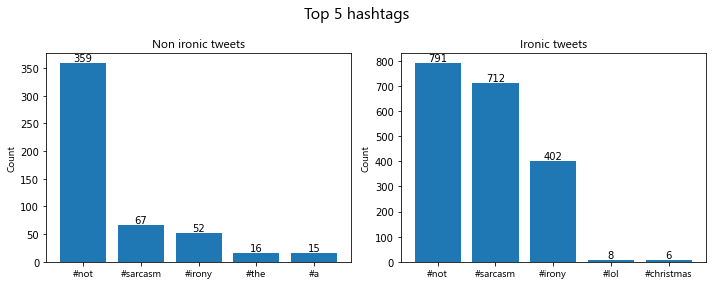

In [7]:
non_ironic_hashtags = BagOfWords(df.loc[df['label'] == 0]['hashtags']).get_vocabulary()
ironic_hashtags = BagOfWords(df.loc[df['label'] == 1]['hashtags']).get_vocabulary()

plot_comparison(non_ironic_hashtags, ironic_hashtags, 5)

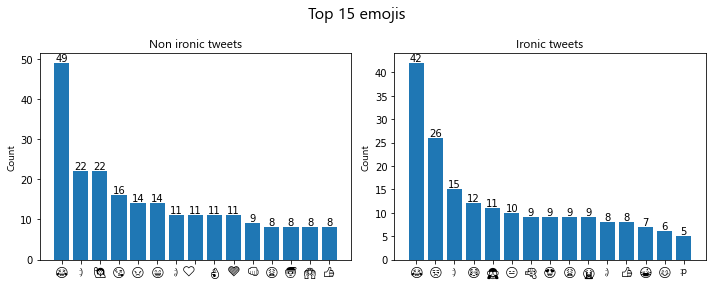

In [8]:
non_ironic_emojis = BagOfWords(df.loc[df['label'] == 0]['emojis']).get_vocabulary()
ironic_emojis = BagOfWords(df.loc[df['label'] == 1]['emojis']).get_vocabulary()

plot_comparison(non_ironic_emojis, ironic_emojis, 15, title='Top 15 emojis')

In [9]:
from ironydetection.preprocessor.emoticon import emoticon_to_emoji
import emoji

def translate_emojis(arr):
    string = ' '.join(arr)
    string = emoticon_to_emoji(string)
    string = emoji.demojize(string, delimiters=(' ', ' '))

    return [i for i in string.split(' ') if len(i)]

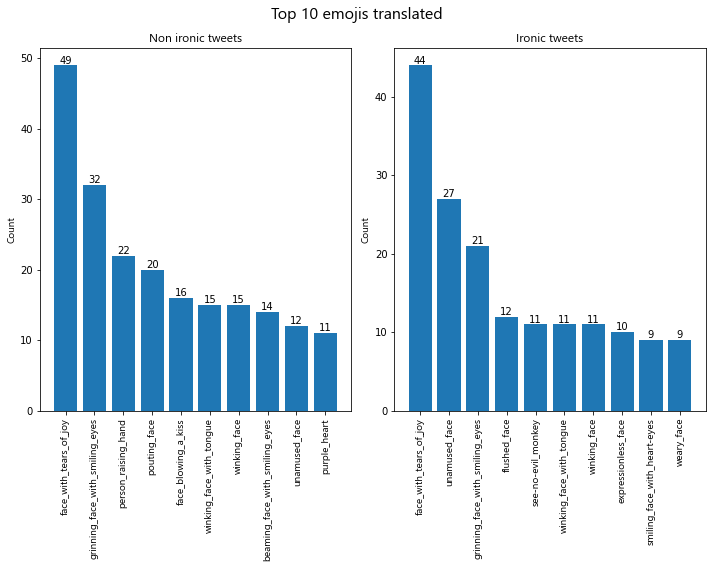

In [10]:
non_ironic_emojis = BagOfWords([translate_emojis(i) for i in df.loc[df['label'] == 0]['emojis'].values]).get_vocabulary()
ironic_emojis = BagOfWords([translate_emojis(i) for i in df.loc[df['label'] == 1]['emojis'].values]).get_vocabulary()

plot_comparison(non_ironic_emojis, ironic_emojis, 10, title='Top 10 emojis translated', rotation='vertical', figsize=(10, 8))

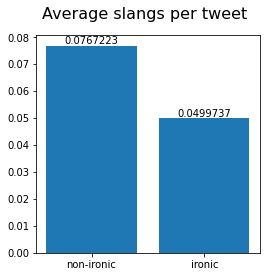

In [11]:
slangs_non_ironic = np.average(df.loc[df['label'] == 0]['n_slang'])
slangs_ironic = np.average(df.loc[df['label'] == 1]['n_slang'])

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Average slangs per tweet', fontsize=16)

bar = ax.bar(np.arange(0, 2), [slangs_non_ironic, slangs_ironic])
ax.bar_label(bar)
ax.set_xticks(np.arange(0, 2))
ax.set_xticklabels(['non-ironic', 'ironic'])

plt.show()

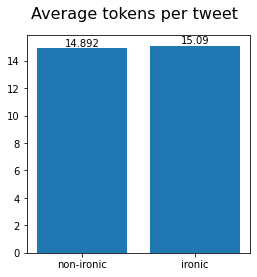

In [16]:
slangs_non_ironic = np.average([len(i) for i in df.loc[df['label'] == 0]['tweet'].values])
slangs_ironic = np.average([len(i) for i in df.loc[df['label'] == 1]['tweet'].values])

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Average tokens per tweet', fontsize=16)

bar = ax.bar(np.arange(0, 2), [slangs_non_ironic, slangs_ironic])
ax.bar_label(bar)
ax.set_xticks(np.arange(0, 2))
ax.set_xticklabels(['non-ironic', 'ironic'])

plt.show()

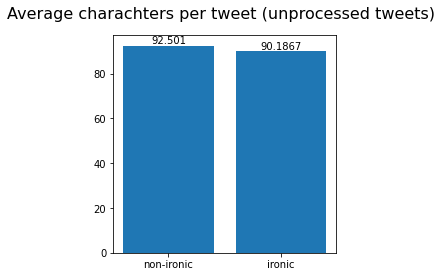

In [18]:
slangs_non_ironic = np.average([len(i) for i in df_raw.loc[df['label'] == 0]['tweet'].values])
slangs_ironic = np.average([len(i) for i in df_raw.loc[df['label'] == 1]['tweet'].values])

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Average charachters per tweet (unprocessed tweets)', fontsize=16)

bar = ax.bar(np.arange(0, 2), [slangs_non_ironic, slangs_ironic])
ax.bar_label(bar)
ax.set_xticks(np.arange(0, 2))
ax.set_xticklabels(['non-ironic', 'ironic'])

plt.show()